In [28]:
import datetime
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def month(date_str):
    return datetime.date.fromisoformat(date_str).strftime('%y %m')

In [21]:
df = pd.read_csv('data/relay_users.csv')
df.head()

,date,country,users,lower,upper,frac
0,2020-03-01,NaN,2419499,NaN,NaN,86
1,2020-03-01,??,13846,NaN,NaN,86
2,2020-03-01,ad,105,46.0,204.0,86
3,2020-03-01,ae,4050,2725.0,6137.0,86
4,2020-03-01,af,462,236.0,696.0,86


In [22]:
df['month'] = df['date'].apply(month)

In [23]:
df.head()

,date,country,users,lower,upper,frac,month
0,2020-03-01,NaN,2419499,NaN,NaN,86,20 03
1,2020-03-01,??,13846,NaN,NaN,86,20 03
2,2020-03-01,ad,105,46.0,204.0,86,20 03
3,2020-03-01,ae,4050,2725.0,6137.0,86,20 03
4,2020-03-01,af,462,236.0,696.0,86,20 03


In [24]:
grouped = df.groupby(['month', 'country'])

In [25]:
grouped = df.groupby(['month'])

In [34]:
all_countries = grouped.aggregate(np.sum).reset_index()
all_countries.head()

,month,users,lower,upper,frac
0,20 03,121858292,38964627.0,84713857.0,682037
1,20 04,117988656,42404746.0,75072668.0,657088
2,20 05,123367138,37781113.0,85894194.0,664442
3,20 06,152505144,47511604.0,95135352.0,657178
4,20 07,145820390,45781319.0,100085612.0,697576


<AxesSubplot:xlabel='month'>

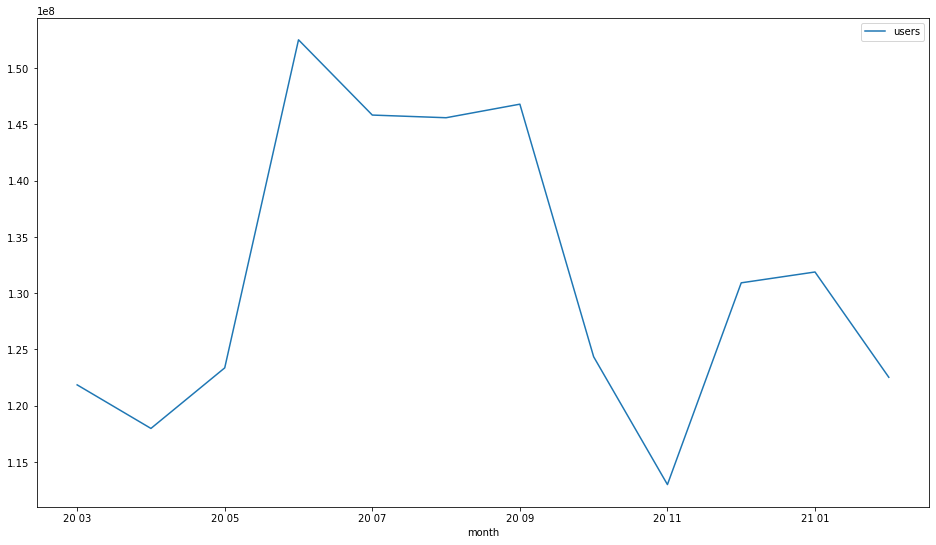

In [36]:
ax = plt.gca()
ax.figure.set_size_inches(16, 9)
all_countries.plot(kind='line', x='month', y='users', ax=ax)